# Steady flow over a gaussian bump

In [11]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from xmitgcm import open_mdsdataset

%matplotlib inline

runs_dir = '../runs/'

# Higher Froude number required small time step to ensure CFL criterion
# not exceeded
deltaTs = {'216': 6, '1300': 6, '3900': 4}
show_time = 43200

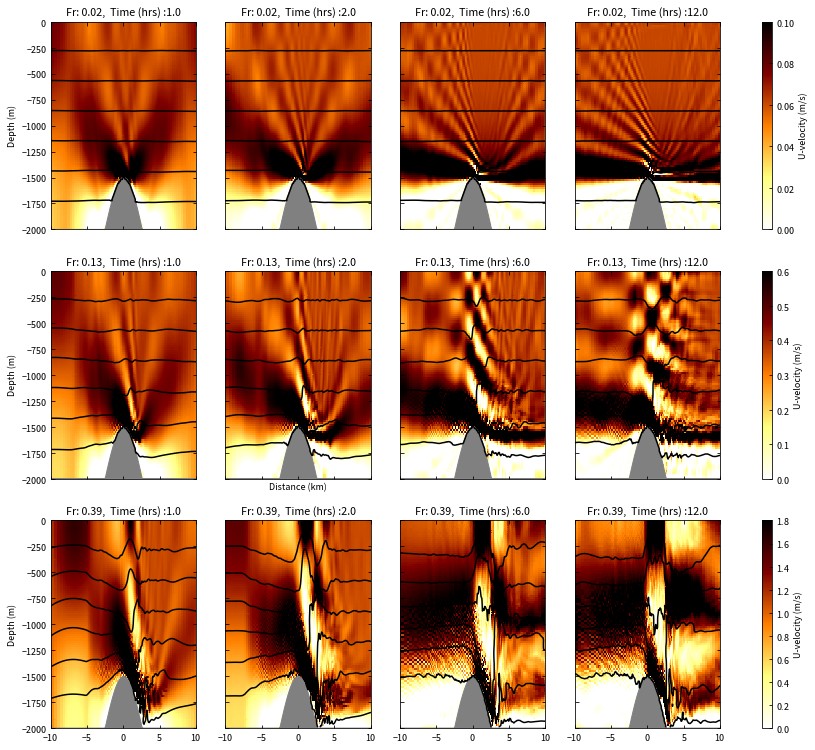

In [14]:
# Factor of three in Fr requires factor of three scaling for velocity
plot_opts = {'216': dict(vmax=0.1),
             '1300': dict(vmax=0.6),
             '3900': dict(vmax=1.8)}

fig, axs = plt.subplots(figsize=(15, 13), nrows=3, ncols=4, 
                        sharex=True, sharey=True)

for i, Fr in enumerate(['216', '1300', '3900']):
    for j, show_time in enumerate([3600, 7200, 21600, 43200]):
        out_iter = show_time/deltaTs[Fr]
        ax = axs[i, j]
        run_dir = runs_dir + 'RunFr' + Fr
        ds = open_mdsdataset(run_dir, prefix=['T', 'U'], iters=[out_iter])

        ds=ds.assign_coords(xc0 = (ds.XC - ds.XC.mean())/1000)

        cax = ax.pcolormesh(ds.xc0, ds.Zp1, ds['U'].squeeze()[:, :-1],
                            vmin=0, cmap='afmhot_r', **plot_opts[Fr])
        ax.contour(ds.xc0, ds.Z, ds['T'].squeeze(), colors='k')

        ax.fill_between(ds.xc0, -ds.Depth.squeeze(), -2000, color='Grey')

        time_hrs = out_iter*deltaTs[Fr]/3600
        ax.set(xlim=(-10, 10), 
               title=('Fr: ' + '{0:2.2f}'.format(int(Fr)/1e4) + 
                      ',  Time (hrs) :' + str(time_hrs)))
    cbar = fig.colorbar(cax, ax=list(axs[i, :]))
    cbar.set_label('U-velocity (m/s)')
    

[ax.set_ylabel('Depth (m)') for ax in axs[:, 0]]
axs[1, 1].set_xlabel('Distance (km)')

$\alpha$ = 500$\,$m/4000$\,$m = 0.125
$N$ = 5.2$\times$10$^{-3}$  
U = (0.0216, 0.13, 0.39) $\cdot N h_0$ = (0.056, 0.33, 1.0)

Timescale for first wavelength response

$\Delta t = \frac{2 \pi}{\alpha N}$ = 2.7 hours